In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Bias-Variance Tradeoff in Classification

## Introduction

The classification error rate can be expressed as:

$$
\Pr[g(x; D) = y] = |2F(x) - 1| \Pr[g(x; D) = y_B] + \Pr[y_B = y}.
$$

This equation shows that the classification error rate is linearly proportional to $\Pr[g(x; D) = y_B]$, which represents a **boundary error** — the mis-estimation of the optimal (Bayes) boundary.

---

## Boundary Error

Due to random variations in the training set, the boundary error depends on $p(g(x; D))$, the probability density of obtaining a particular estimate of the discriminant given $D$. The boundary error is the area of the tail of $p(g(x; D))$ on the opposite side of the Bayes discriminant value $\frac{1}{2}$:

$$
\Pr[g(x; D) = y_B] =
\begin{cases} 
    \int_{1/2}^{\infty} p(g(x; D)) \, dg, & \text{if } F(x) < \frac{1}{2}, \\
    \int_{-\infty}^{1/2} p(g(x; D)) \, dg, & \text{if } F(x) \geq \frac{1}{2}.
\end{cases}
$$

---

## Gaussian Assumption

Assuming $p(g(x; D))$ is Gaussian, we find:

$$
\Pr[g(x; D) = y_B] = \Phi\left(\operatorname{sgn}[F(x) - \frac{1}{2}] \frac{\mathbb{E}_D[g(x; D)] - \frac{1}{2}}{\sqrt{\operatorname{Var}[g(x; D)]}}\right),
$$

where $\Phi[t]$ is the cumulative distribution function (CDF) of the standard normal distribution:

$$
\Phi[t] = \frac{1}{\sqrt{2\pi}} \int_t^{\infty} e^{-\frac{1}{2}u^2} \, du = 1 - \operatorname{erf}[t].
$$

Here, $\operatorname{erf}[\cdot]$ is the error function.

---

## Bias and Variance in Classification

Boundary error depends on **boundary bias** and **variance**. Unlike regression, where error is additive in bias and variance, classification error involves a nonlinear and multiplicative relationship. Specifically:

- The **sign** of the boundary bias affects the role of variance in the error.
- When variance is small, the classification error is particularly sensitive to boundary bias.

This relationship highlights the importance of reducing **variance** over bias in classification tasks.

---

## Practical Implications

In classification tasks, models with higher flexibility (e.g., more free parameters) tend to have lower bias but higher variance. Conversely, simpler models exhibit higher bias but lower variance.

To illustrate, consider a two-class problem with samples drawn from 2D Gaussian distributions, parameterized as:

$$
p(x | \omega_i) \sim \mathcal{N}(\mu_i, \Sigma_i), \quad i = 1, 2.
$$

### Model Classes
Three types of classifiers are trained with increasing bias:

1. **Low Bias (High Variance):** General Gaussian classifiers with arbitrary covariance matrices.
2. **Medium Bias (Medium Variance):** Diagonal covariance Gaussian classifiers.
3. **High Bias (Low Variance):** Gaussian classifiers with covariance fixed to the identity matrix (circular distributions).

### Observations
- Low bias models adapt closely to the training data, resulting in high variance across different datasets.
- High bias models produce more consistent classifications but deviate further from the optimal boundary.

---

## Generalization Error

As the training size $n$ increases:

- Variance decreases.
- Bias may increase if the model is not flexible enough to adapt to the data.

For large $n$, the error histograms for a well-matched model approach a delta function centered at the Bayes error $E_B$. 

### Key Insights:
1. **Variance dominates bias** in classification tasks. 
2. **Low generalization error** requires:
   - Low variance.
   - A model that matches the true data distribution.

The ideal scenario of zero bias and variance is only achievable with perfect prior knowledge of the true model, rendering learning unnecessary.

---

## Conclusion

The interplay between bias and variance in classification is nonlinear and context-dependent. Practical adjustments (e.g., pruning, varying parameters) can optimize the tradeoff, but prioritizing low variance is generally more important for accurate classification.

---


## Resampling for Estimating Statistics

## Introduction

When applying a learning algorithm to a new pattern recognition problem with an unknown distribution, how can we determine bias and variance? Figures 9.4 and 9.5 illustrate the tradeoff between bias and variance using multiple samples, which inspire formal **resampling methods**. 

---

## The Bias-Variance Tradeoff

Figure 9.5 illustrates the bias-variance tradeoff in classification using a two-dimensional Gaussian problem. 

### Key Observations:
1. **True Decision Boundary**: At the top of the figure, the Bayes decision boundary is shown.
2. **Learned Boundaries**:
   - **Column (a):** General Gaussian models with fully general covariance matrices. These boundaries differ significantly across datasets, indicating high variance.
   - **Column (b):** Gaussian models with diagonal covariance matrices. These boundaries vary less, showing reduced variance compared to column (a).
   - **Column (c):** Gaussian models with unit covariance matrices (linear models). These boundaries are nearly identical across datasets, demonstrating very low variance.
3. **Error Histograms**:
   - Higher variance leads to broader distributions of error, while lower variance results in narrower distributions.

The bias-variance tradeoff highlights that increased flexibility in the model typically results in lower bias but higher variance.

---

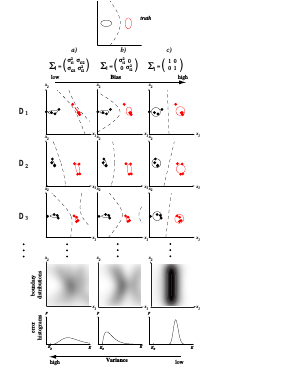

Fig.5: The (boundary) bias-variance tradeoﬀ in classiﬁcation can be illustrated with a two-dimensional Gaussian problem. The ﬁgure at the top shows the (true) decision boundary of the Bayes classiﬁer. The nine ﬁgures in the middle show nine diﬀerent learned decision boundaries. Each row corresponds to a diﬀerent training set of n = 8 points selected randomly from the true distributions and labeled according to the true decision boundary. Column a) shows the decision boundaries learning by ﬁtting a Gaussian model with fully general covariance matrices by maximum like- lihood. The learned boundaries diﬀer signiﬁcantly from one data set to the next; this learning algorithm has high variance. Column b) shows the decision boundaries resulting from ﬁtting a Gaussian model with diagonal covariances; in this case the decision boundaries vary less from one row to another. This learning algorithm has a lower variance than the one at the left. Finally, column c) at the right shows decision boundaries learning by ﬁtting a Gaussian model with unit covariances (i.e., a linear model); notice that the decision boundaries are nearly identical from one data set to the next. This algorithm has low variance.

## The Jackknife Method

Resampling can provide more informative estimates of general statistics. For example, consider a dataset $D$ of $n$ data points $x_i$ sampled from a one-dimensional distribution. 

### Mean and Variance

The estimate of the mean is:

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^n x_i.
$$

The standard deviation (estimate of accuracy of the mean) is:

$$
\hat{\sigma} = \sqrt{\frac{1}{n(n-1)} \sum_{i=1}^n (x_i - \hat{\mu})^2}.
$$

### Problem with Other Statistics

For statistics like the **median**, **mode**, or **percentiles**, there is no straightforward extension of the standard deviation formula to measure the error of the estimate.

---

### Leave-One-Out Estimates

In resampling theory, statistics often involve leaving one data point out. The **leave-one-out mean** is defined as:

$$
\mu_{(i)} = \frac{1}{n-1} \sum_{j \neq i} x_j = \frac{n\bar{x} - x_i}{n-1},
$$

where $\bar{x}$ is the sample mean.

The **jackknife estimate of the mean** is the mean of the leave-one-out means:

$$
\mu_{\cdot} = \frac{1}{n} \sum_{i=1}^n \mu_{(i)}.
$$

It can be shown that the jackknife estimate of the mean is equivalent to the traditional estimate:

$$
\hat{\mu} = \mu_{\cdot}.
$$

---

### Jackknife Variance

The jackknife estimate of the variance of the mean is given by:

$$
\text{Var}[\hat{\mu}] = \frac{n-1}{n} \sum_{i=1}^n (\mu_{(i)} - \mu_{\cdot})^2.
$$

For the mean, this variance is equivalent to the traditional variance formula.

---

## Historical Notes

- The jackknife method is also known as the **leave-one-out method**.
- It was introduced by Maurice Quenouille and popularized by John W. Tukey, who named it "jackknife" to reflect its versatility and usefulness.

---

## Conclusion

Resampling methods like the jackknife provide a systematic way to estimate statistics and their variances, extending the traditional approach to arbitrary statistics. These methods form the foundation for broader resampling techniques, including the **bootstrap**, discussed in subsequent sections.

---


In [1]:
# Jackknife implementation for estimating mean and variance
def jackknife(data):
    """
    Perform the Jackknife resampling method to estimate the mean and variance of the data.

    Args:
        data (list or array-like): The dataset to analyze.

    Returns:
        tuple: (mean, jackknife variance)
    """
    n = len(data)
    
    # Calculate leave-one-out means
    leave_one_out_means = [(sum(data) - data[i]) / (n - 1) for i in range(n)]
    
    # Calculate the jackknife mean
    jackknife_mean = sum(leave_one_out_means) / n
    
    # Calculate the jackknife variance
    jackknife_variance = ((n - 1) / n) * sum(
        (leave_one_out_means[i] - jackknife_mean) ** 2 for i in range(n)
    )
    
    return jackknife_mean, jackknife_variance

# Example usage
if __name__ == "__main__":
    # Sample data
    data = [2.0, 4.0, 4.5, 6.0, 8.0, 10.0]
    
    # Perform jackknife analysis
    mean, variance = jackknife(data)
    
    # Print results
    print(f"Jackknife Mean Estimate: {mean}")
    print(f"Jackknife Variance Estimate: {variance}")


Jackknife Mean Estimate: 5.75
Jackknife Variance Estimate: 1.3958333333333326


## Jackknife Resampling for Estimating Statistics

The **Jackknife resampling method** provides a powerful framework for estimating the bias, variance, and other statistical properties of a given estimator. This notebook demonstrates the application of the Jackknife method for bias and variance estimation, using the example of the mode.

## Definitions

The Jackknife approach estimates statistical properties by systematically removing individual data points and recalculating the estimator. For a statistic $\hat{\theta}$, we define:

1. **Leave-One-Out Estimator**:
   $$
   \hat{\theta}_{(i)} = \hat{\theta}(x_1, x_2, \dots, x_{i-1}, x_{i+1}, \dots, x_n)
   $$

2. **Jackknife Bias Estimate**:
   $$
   \text{bias}_{\text{jack}} = (n - 1)(\hat{\theta}_{(\cdot)} - \hat{\theta}),
   $$
   where
   $$
   \hat{\theta}_{(\cdot)} = \frac{1}{n} \sum_{i=1}^n \hat{\theta}_{(i)}.
   $$

3. **Jackknife Variance Estimate**:
   $$
   \text{Var}_{\text{jack}}[\hat{\theta}] = \frac{n - 1}{n} \sum_{i=1}^n (\hat{\theta}_{(i)} - \hat{\theta}_{(\cdot)})^2.
   $$

---

## Example: Jackknife Bias and Variance for the Mode

### Data
Consider the dataset:
$$
D = \{0, 10, 10, 10, 20, 20\}
$$

1. The mode of this dataset is:
   $$
   \hat{\theta} = 10
   $$

2. Calculate the leave-one-out modes:
   - Removing $x_1 = 0$: Mode = $10$
   - Removing $x_2 = 10$: Mode = $15$
   - Removing $x_3 = 10$: Mode = $15$
   - Removing $x_4 = 10$: Mode = $15$
   - Removing $x_5 = 20$: Mode = $10$
   - Removing $x_6 = 20$: Mode = $10$

3. Compute the Jackknife estimate of the mode:
   $$
   \hat{\theta}_{(\cdot)} = \frac{1}{n} \sum_{i=1}^n \hat{\theta}_{(i)} = \frac{10 + 15 + 15 + 15 + 10 + 10}{6} = 12.5
   $$

4. Estimate the Jackknife bias:
   $$
   \text{bias}_{\text{jack}} = (n - 1)(\hat{\theta}_{(\cdot)} - \hat{\theta}) = 5(12.5 - 10) = 12.5
   $$

5. Estimate the Jackknife variance:
   $$
   \text{Var}_{\text{jack}}[\hat{\theta}] = \frac{n - 1}{n} \sum_{i=1}^n (\hat{\theta}_{(i)} - \hat{\theta}_{(\cdot)})^2
   $$
   Substituting values:
   $$
   \text{Var}_{\text{jack}}[\hat{\theta}] = \frac{5}{6} \left[(10 - 12.5)^2 + 3(15 - 12.5)^2 + 2(10 - 12.5)^2 \right] = 31.25
   $$

6. Standard deviation (effective range):
   $$
   \sqrt{\text{Var}_{\text{jack}}[\hat{\theta}]} = \sqrt{31.25} \approx 5.6
   $$

---

### Visualization
A histogram of the data, along with a red bar indicating twice the standard deviation, helps visualize the Jackknife estimate and its range of probable values.

---



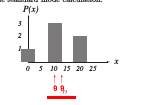


In [2]:

import numpy as np
from scipy.stats import mode

# Data
data = [0, 10, 10, 10, 20, 20]
n = len(data)

# Leave-one-out modes
leave_one_out_modes = []
for i in range(n):
    data_leave_one_out = data[:i] + data[i+1:]
    leave_one_out_modes.append(mode(data_leave_one_out).mode[0])

# Jackknife mean of the modes
jackknife_mean = np.mean(leave_one_out_modes)

# Jackknife bias
jackknife_bias = (n - 1) * (jackknife_mean - mode(data).mode[0])

# Jackknife variance
jackknife_variance = (n - 1) / n * np.sum((np.array(leave_one_out_modes) - jackknife_mean) ** 2)

# Standard deviation
jackknife_std = np.sqrt(jackknife_variance)

# Results
print(f"Jackknife Mean of Modes: {jackknife_mean}")
print(f"Jackknife Bias: {jackknife_bias}")
print(f"Jackknife Variance: {jackknife_variance}")
print(f"Jackknife Standard Deviation: {jackknife_std}")


Jackknife Mean of Modes: 10.0
Jackknife Bias: 0.0
Jackknife Variance: 0.0
Jackknife Standard Deviation: 0.0


## Bootstrap and Boosting for Resampling and Classifier Design

This notebook explores **Bootstrap** resampling methods for estimating statistics and their application in **classifier design**, including **Bagging** and **Boosting** techniques.

##  Bootstrap Resampling

### What is Bootstrap?

Bootstrap is a resampling technique where new datasets (called bootstrap datasets) are created by randomly selecting $n$ points from the original dataset $D$ with replacement. Since $D$ contains $n$ points, there is typically duplication of points in a bootstrap dataset. The bootstrap estimation involves repeating this resampling process $B$ times to generate $B$ independent bootstrap datasets, each used to estimate the statistic of interest.

### Bootstrap Estimate of a Statistic

The bootstrap estimate of a statistic $\hat{\theta}^*(\cdot)$ is simply the mean of the $B$ estimates from each bootstrap sample:
$$
\hat{\theta}^*(\cdot) = \frac{1}{B} \sum_{b=1}^B \hat{\theta}^*(b),
$$
where $\hat{\theta}^*(b)$ is the statistic computed from the $b$-th bootstrap sample.

### Bootstrap Bias Estimate

The bootstrap estimate of the bias of the estimator $\hat{\theta}$ is given by:
$$
\text{bias}_{\text{boot}} = \hat{\theta}^*(\cdot) - \hat{\theta}.
$$
This estimate provides an understanding of how much the estimator deviates from the true value.

### Bootstrap Variance Estimate

The bootstrap estimate of the variance of a statistic is given by:
$$
\text{Var}_{\text{boot}}[\hat{\theta}] = \frac{1}{B} \sum_{b=1}^B (\hat{\theta}^*(b) - \hat{\theta}^*(\cdot))^2.
$$
This variance estimate helps quantify the uncertainty in the statistic \(\hat{\theta}\).

---

##  Resampling for Classifier Design

### Bagging (Bootstrap Aggregating)

**Bagging** is a resampling method that improves the performance of a classifier by creating multiple versions of a training set through resampling with replacement. Each bootstrap sample is used to train a separate classifier, and the final classification decision is made based on the majority vote from all classifiers. This method is particularly beneficial for unstable classifiers, where small changes in the training data can result in large changes in the model.

### Bagging Procedure
1. **Create $B$ bootstrap samples** from the original dataset $D$.
2. **Train a classifier** on each bootstrap sample.
3. **Classify new data** by taking the majority vote of the $B$ classifiers.

Bagging helps stabilize classifiers and reduce variance, especially for models like decision trees that are prone to high variance.

### Example: Decision Trees and Bagging

When using decision trees with bagging, multiple trees are trained on different bootstrap samples, and their predictions are aggregated to give a final decision. This reduces the high variance seen in individual decision trees.

---

### Boosting

Boosting is an ensemble learning technique that focuses on improving the performance of a classifier by combining the output of several weak classifiers, typically using a sequential learning process. Each new classifier is trained to correct the errors made by the previous classifiers, which results in a stronger overall model.

#### Boosting Procedure:
1. **Train the first classifier** $C_1$ on a subset $D_1$ of the dataset.
2. **Identify misclassified patterns** by $C_1$ and form a new dataset $D_2$ for the next classifier $C_2$.
3. **Train the second classifier** $C_2$ on $D_2$, focusing on the misclassified patterns from $C_1$.
4. **Repeat the process** with subsequent classifiers $C_3, C_4, \dots$, each focused on the errors of the previous classifiers.

Boosting can lead to very high performance on the training set, often achieving a very low training error, or even zero error if the problem is separable.

#### Example: AdaBoost

**AdaBoost** is one of the most popular boosting algorithms. It combines weak classifiers in a weighted manner, where each classifier is trained with an emphasis on the misclassified samples from previous iterations.

---

### Illustration of the Boosting Algorithm (3-Component Classifier Example)

Suppose we have a two-category classification problem, and we want to create three component classifiers using boosting:

1. **Select a subset** $D_1$ from the dataset $D$ (size $n_1 < n$) and train the first classifier $C_1$ on this subset.
2. **Create a second dataset** $D_2$ that contains misclassified patterns by $C_1$. This dataset is used to train the second classifier $C_2$.
3. **Create a third dataset** $D_3$ from patterns that are misclassified by both $C_1$ and $C_2$. Train the third classifier $C_3$ on this dataset.

The final decision rule is based on the votes from the three classifiers:
- If $C_1$ and $C_2$ agree on the category, that is the final classification.
- If $C_1$ and $C_2$ disagree, the final classification is made by $C_3$.

---

### Summary

Both **Bagging** and **Boosting** are effective resampling methods used to enhance classifier performance. **Bagging** reduces variance by averaging over multiple models trained on different bootstrap samples, while **Boosting** improves accuracy by sequentially training classifiers that focus on correcting the errors of previous classifiers. These methods can be used to improve the stability and accuracy of classifiers, especially in cases where the classifier is unstable.



In [3]:
import numpy as np
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load a sample dataset (Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function for Bootstrap resampling
def bootstrap_resampling(X, y, B=100):
    n = len(y)
    bootstrap_samples = []
    for _ in range(B):
        # Resample with replacement
        X_resampled, y_resampled = resample(X, y, n_samples=n, random_state=None)
        bootstrap_samples.append((X_resampled, y_resampled))
    return bootstrap_samples

# Function to compute the mean statistic for each bootstrap sample
def bootstrap_estimate(X, y, estimator, B=100):
    bootstrap_samples = bootstrap_resampling(X, y, B)
    estimates = []
    for X_resampled, y_resampled in bootstrap_samples:
        estimator.fit(X_resampled, y_resampled)
        estimates.append(estimator.score(X_test, y_test))  # Accuracy of the classifier on the test set
    return np.mean(estimates)

# Define the classifier (Decision Tree)
classifier = DecisionTreeClassifier(random_state=42)

# Compute Bootstrap estimate for accuracy
bootstrap_accuracy = bootstrap_estimate(X_train, y_train, classifier, B=100)
print(f'Bootstrap estimate of accuracy: {bootstrap_accuracy:.4f}')


Bootstrap estimate of accuracy: 0.9887


In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create a base classifier (weak learner)
base_classifier = DecisionTreeClassifier(max_depth=1, random_state=42)

# Create the AdaBoost classifier
boosting_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoost model
boosting_classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = boosting_classifier.predict(X_test)
boosting_accuracy = accuracy_score(y_test, y_pred)

print(f'Boosting (AdaBoost) accuracy: {boosting_accuracy:.4f}')


Boosting (AdaBoost) accuracy: 1.0000


In [5]:
import random

# Simple decision rule classifier (for illustration purposes)
class SimpleClassifier:
    def __init__(self):
        self.threshold = 0.5
    
    def fit(self, X, y):
        # A very simple classifier that always predicts the majority class
        self.threshold = sum(y) / len(y)
    
    def predict(self, X):
        # Predict based on the threshold rule
        return [1 if x >= self.threshold else 0 for x in X]


# Function to perform bootstrap resampling
def bootstrap_resampling(X, y, B=100):
    n = len(y)
    bootstrap_samples = []
    
    for _ in range(B):
        indices = [random.randint(0, n-1) for _ in range(n)]
        X_resampled = [X[i] for i in indices]
        y_resampled = [y[i] for i in indices]
        bootstrap_samples.append((X_resampled, y_resampled))
    
    return bootstrap_samples

# Function to estimate classifier accuracy using bootstrap
def bootstrap_estimate(X, y, classifier, B=100):
    bootstrap_samples = bootstrap_resampling(X, y, B)
    estimates = []
    
    for X_resampled, y_resampled in bootstrap_samples:
        classifier.fit(X_resampled, y_resampled)
        y_pred = classifier.predict(X)  # Test on the same data for simplicity
        accuracy = sum([1 for true, pred in zip(y, y_pred) if true == pred]) / len(y)
        estimates.append(accuracy)
    
    return sum(estimates) / len(estimates)

# Sample data (X: features, y: labels)
X = [0.1, 0.4, 0.35, 0.8, 0.3, 0.7]  # Features
y = [0, 0, 0, 1, 0, 1]  # Labels

# Classifier and bootstrap estimate
classifier = SimpleClassifier()
bootstrap_accuracy = bootstrap_estimate(X, y, classifier, B=100)
print(f'Bootstrap estimate of accuracy: {bootstrap_accuracy:.4f}')


Bootstrap estimate of accuracy: 0.6650


In [ ]:
import random
import math

# Simple decision rule classifier (for illustration purposes)
class SimpleClassifier:
    def __init__(self):
        self.threshold = 0.5
    
    def fit(self, X, y, sample_weights):
        # A simple classifier that predicts 1 if the value is above the threshold
        weighted_sum = sum([x * w for x, w in zip(X, sample_weights)])
        total_weight = sum(sample_weights)
        
        # Prevent division by zero by ensuring total_weight is not zero
        if total_weight == 0:
            total_weight = 1e-10  # Small positive value to avoid zero division
        
        self.threshold = weighted_sum / total_weight
    
    def predict(self, X):
        return [1 if x >= self.threshold else 0 for x in X]

# AdaBoost algorithm (simplified version)
def adaboost(X, y, T=50):
    n = len(y)
    w = [1/n] * n  # Initialize weights to be equal
    classifiers = []
    alphas = []
    
    for t in range(T):
        classifier = SimpleClassifier()
        classifier.fit(X, y, w)
        y_pred = classifier.predict(X)
        
        # Calculate error rate
        error = sum([w[i] for i in range(n) if y_pred[i] != y[i]]) / sum(w)
        
        # Avoid division by zero for error calculation
        if error == 0:
            alpha = math.inf
        else:
            alpha = 0.5 * math.log((1 - error) / error)
        
        # Update weights
        for i in range(n):
            if y_pred[i] == y[i]:
                w[i] *= math.exp(-alpha)
            else:
                w[i] *= math.exp(alpha)
        
        # Normalize weights (Ensure the sum of weights is non-zero)
        total_weight = sum(w)
        if total_weight == 0:
            total_weight = 1e-10  # Avoid division by zero
        w = [wi / total_weight for wi in w]
        
        # Store classifier and its alpha
        classifiers.append(classifier)
        alphas.append(alpha)
    
    return classifiers, alphas

# AdaBoost prediction
def adaboost_predict(X, classifiers, alphas):
    final_prediction = []
    
    for x in X:
        weighted_votes = 0
        for classifier, alpha in zip(classifiers, alphas):
            vote = classifier.predict([x])[0]
            weighted_votes += alpha if vote == 1 else -alpha
        final_prediction.append(1 if weighted_votes > 0 else 0)
    
    return final_prediction

# Sample data (X: features, y: labels)
X = [0.1, 0.4, 0.35, 0.8, 0.3, 0.7]  # Features
y = [0, 0, 0, 1, 0, 1]  # Labels

# Train AdaBoost
classifiers, alphas = adaboost(X, y, T=50)

# Predict with AdaBoost
y_pred = adaboost_predict(X, classifiers, alphas)

# Evaluate AdaBoost accuracy
boosting_accuracy = sum([1 for true, pred in zip(y, y_pred) if true == pred]) / len(y)
print(f'Boosting (AdaBoost) accuracy: {boosting_accuracy:.4f}')


## AdaBoost Algorithm

AdaBoost, short for **Adaptive Boosting**, is an ensemble learning algorithm that combines multiple weak learners to create a strong classifier. A weak learner is defined as a classifier that performs slightly better than random guessing. AdaBoost iteratively trains weak learners, focusing on examples that were misclassified by previous classifiers, with the goal of reducing the overall error rate.

## AdaBoost Algorithm Steps

The basic AdaBoost algorithm works as follows:

1. **Initialization:**
   - Given a dataset $ D = \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\} $, where $ x_i $ is the feature vector and $ y_i \in \{-1, +1\} $ is the class label.
   - Initialize the weights of the training samples $ W_1(i) = \frac{1}{n} $ for all $ i $, where 4 n $ is the number of training samples.

2. **Iterative Process:**
   - For each iteration $ k = 1, 2, \dots, k_{\text{max}} $:
     1. **Train a weak learner** $ C_k $ on the dataset $ D $ with weights $ W_k(i) $, focusing on the examples that have higher weights.
     2. **Calculate the error** $ E_k $ of classifier $ C_k $ on the weighted training set:
        $$
        E_k = \frac{\sum_{i: h_k(x_i) \neq y_i} W_k(i)}{\sum_{i=1}^n W_k(i)}
        $$
     3. **Compute the classifier weight** $ \alpha_k $:
        $$
        \alpha_k = \frac{1}{2} \ln \left( \frac{1 - E_k}{E_k} \right)
        $$ 
     4. **Update the weights of the training samples**:
        $$
        W_{k+1}(i) = W_k(i) \cdot e^{-\alpha_k \cdot y_i h_k(x_i)}
        $$
        where $ h_k(x_i) $ is the prediction of the weak classifier $ C_k $ for sample $ x_i $, and $ y_i $ is the true label of $ x_i $.
     5. **Normalize the weights** to ensure that $ W_{k+1}(i) $ forms a valid probability distribution:
        $$
        Z_k = \sum_{i=1}^n W_{k+1}(i)
        $$
        and normalize by:
        $$
        W_{k+1}(i) = \frac{W_{k+1}(i)}{Z_k}
        $$

3. **Final Model:**
   - After $ k_{\text{max}} $ iterations, the final model is a weighted combination of all weak learners:
     $$
     g(x) = \sum_{k=1}^{k_{\text{max}}} \alpha_k h_k(x)
     $$

4. **Classification Decision:**
   - The final classification decision for a test point $ x $ is:
     $$
     \hat{y} = \text{sgn}(g(x))
     $$

## Key Properties of AdaBoost

- **Error Bound:**
  AdaBoost's error decreases exponentially with the number of iterations. For weak learners $ C_k $, the error $ E_k $ can be written as:
  $$
  E_k = \frac{1}{2} - G_k
  $$ 
  where $ G_k $ is some positive value. The overall training error for the ensemble classifier is:
  $$
  E_{\text{ensemble}} = 1 - 4 \sum_{k=1}^{k_{\text{max}}} G_k^2
  $$

  As $ k_{\text{max}} $ increases, the training error decreases exponentially:
  $$
  E_{\text{ensemble}} \leq \exp \left( -2 \sum_{k=1}^{k_{\text{max}}} G_k^2 \right)
  $$

- **Generalization:**
  Although AdaBoost is very effective at minimizing training error, overfitting is rare in practice. AdaBoost tends to improve generalization even with a large number of iterations.

## Example Visualization

Consider a two-dimensional classification task with two categories $ R1 $ and $ R2 $. The component classifiers $ C_1 $, $ C_2 $, and $ C_3 $ are weak learners trained using the AdaBoost procedure. As shown in the diagram below, the final classification decision is made by a weighted voting mechanism over the outputs of the individual classifiers.

$$
\text{Final Classification} = \text{Vote}(C_1, C_2, C_3)
$$

This results in a non-linear decision boundary.

## Conclusion

AdaBoost is a powerful technique that can significantly reduce the error of weak learners. The key idea is to focus on difficult-to-classify examples by iteratively updating their weights, which allows the ensemble of weak classifiers to form a strong predictor. Despite its simplicity, AdaBoost has proven to be effective in many real-world tasks.



In [9]:
import numpy as np

class SimpleClassifier:
    """
    A simple classifier for binary classification that returns +1 or -1 based on a threshold
    """
    def __init__(self):
        self.threshold = None

    def fit(self, X, y, sample_weights):
        # Calculate the threshold for the weak classifier based on weighted samples
        weighted_sum = np.dot(X.T, sample_weights * (y == 1).astype(int) - (y == -1).astype(int))
        self.threshold = np.sign(weighted_sum)
        
    def predict(self, X):
        return np.sign(np.dot(X, self.threshold))

def adaboost(X, y, T):
    """
    AdaBoost algorithm implementation
    
    Args:
    - X: Feature matrix (n_samples x n_features)
    - y: Labels (n_samples)
    - T: Number of weak learners
    
    Returns:
    - classifiers: List of trained weak classifiers
    - alphas: List of alpha values for each weak classifier
    """
    n_samples, n_features = X.shape
    w = np.ones(n_samples) / n_samples  # Initialize sample weights uniformly
    classifiers = []
    alphas = []
    
    for t in range(T):
        # Train a weak classifier
        classifier = SimpleClassifier()
        classifier.fit(X, y, w)
        y_pred = classifier.predict(X)
        
        # Calculate the error
        error = np.sum(w * (y_pred != y)) / np.sum(w)
        
        # If error is zero, stop early
        if error == 0:
            break
        
        # Compute the alpha (classifier weight)
        alpha = 0.5 * np.log((1 - error) / error)
        
        # Update sample weights
        w = w * np.exp(-alpha * y * y_pred)
        
        # Normalize weights
        w /= np.sum(w)
        
        # Store the classifier and its weight
        classifiers.append(classifier)
        alphas.append(alpha)
    
    return classifiers, alphas

def predict(X, classifiers, alphas):
    """
    Make predictions with AdaBoost
    
    Args:
    - X: Feature matrix (n_samples x n_features)
    - classifiers: List of trained weak classifiers
    - alphas: List of alpha values for each weak classifier
    
    Returns:
    - Predicted labels
    """
    # Calculate the weighted sum of predictions
    pred = np.zeros(X.shape[0])
    for classifier, alpha in zip(classifiers, alphas):
        pred += alpha * classifier.predict(X)
    
    # Final prediction is the sign of the weighted sum
    return np.sign(pred)

# Example usage
if __name__ == "__main__":
    # Sample dataset (2D binary classification problem)
    X = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])  # 4 samples, 2 features
    y = np.array([1, 1, -1, -1])  # Labels for the samples
    
    # Train AdaBoost with 50 iterations
    classifiers, alphas = adaboost(X, y, T=50)
    
    # Make predictions on the training data
    predictions = predict(X, classifiers, alphas)
    
    # Output predictions
    print("Predictions:", predictions)
    print("True Labels:", y)


Predictions: [0. 0. 0. 0.]
True Labels: [ 1  1 -1 -1]


In [10]:
import math

class SimpleClassifier:
    """
    A simple classifier for binary classification that returns +1 or -1 based on a threshold
    """
    def __init__(self):
        self.threshold = None

    def fit(self, X, y, sample_weights):
        # Calculate the threshold for the weak classifier based on weighted samples
        weighted_sum = [0] * len(X[0])  # Initialize a list for storing the weighted sum for each feature
        for i in range(len(X)):
            for j in range(len(X[i])):
                weighted_sum[j] += (y[i] == 1) * sample_weights[i] * X[i][j] - (y[i] == -1) * sample_weights[i] * X[i][j]

        self.threshold = [1 if value > 0 else -1 for value in weighted_sum]

    def predict(self, X):
        predictions = []
        for x in X:
            dot_product = sum([x[i] * self.threshold[i] for i in range(len(x))])
            predictions.append(1 if dot_product >= 0 else -1)
        return predictions

def adaboost(X, y, T):
    """
    AdaBoost algorithm implementation
    
    Args:
    - X: Feature matrix (n_samples x n_features)
    - y: Labels (n_samples)
    - T: Number of weak learners
    
    Returns:
    - classifiers: List of trained weak classifiers
    - alphas: List of alpha values for each weak classifier
    """
    n_samples = len(X)
    w = [1.0 / n_samples] * n_samples  # Initialize sample weights uniformly
    classifiers = []
    alphas = []

    for t in range(T):
        # Train a weak classifier
        classifier = SimpleClassifier()
        classifier.fit(X, y, w)
        y_pred = classifier.predict(X)

        # Calculate the error
        error = sum([w[i] for i in range(n_samples) if y_pred[i] != y[i]]) / sum(w)

        # If error is zero, stop early
        if error == 0:
            break

        # Compute the alpha (classifier weight)
        alpha = 0.5 * math.log((1 - error) / error)

        # Update sample weights
        for i in range(n_samples):
            if y_pred[i] == y[i]:
                w[i] *= math.exp(-alpha)
            else:
                w[i] *= math.exp(alpha)

        # Normalize weights
        weight_sum = sum(w)
        w = [wi / weight_sum for wi in w]

        # Store the classifier and its weight
        classifiers.append(classifier)
        alphas.append(alpha)

    return classifiers, alphas

def predict(X, classifiers, alphas):
    """
    Make predictions with AdaBoost
    
    Args:
    - X: Feature matrix (n_samples x n_features)
    - classifiers: List of trained weak classifiers
    - alphas: List of alpha values for each weak classifier
    
    Returns:
    - Predicted labels
    """
    pred = [0] * len(X)
    for classifier, alpha in zip(classifiers, alphas):
        y_pred = classifier.predict(X)
        for i in range(len(X)):
            pred[i] += alpha * y_pred[i]
    
    # Final prediction is the sign of the weighted sum
    return [1 if p >= 0 else -1 for p in pred]


# Example usage
if __name__ == "__main__":
    # Sample dataset (2D binary classification problem)
    X = [[1, 1], [1, -1], [-1, 1], [-1, -1]]  # 4 samples, 2 features
    y = [1, 1, -1, -1]  # Labels for the samples
    
    # Train AdaBoost with 50 iterations
    classifiers, alphas = adaboost(X, y, T=50)
    
    # Make predictions on the training data
    predictions = predict(X, classifiers, alphas)
    
    # Output predictions
    print("Predictions:", predictions)
    print("True Labels:", y)


Predictions: [1, 1, 1, -1]
True Labels: [1, 1, -1, -1]


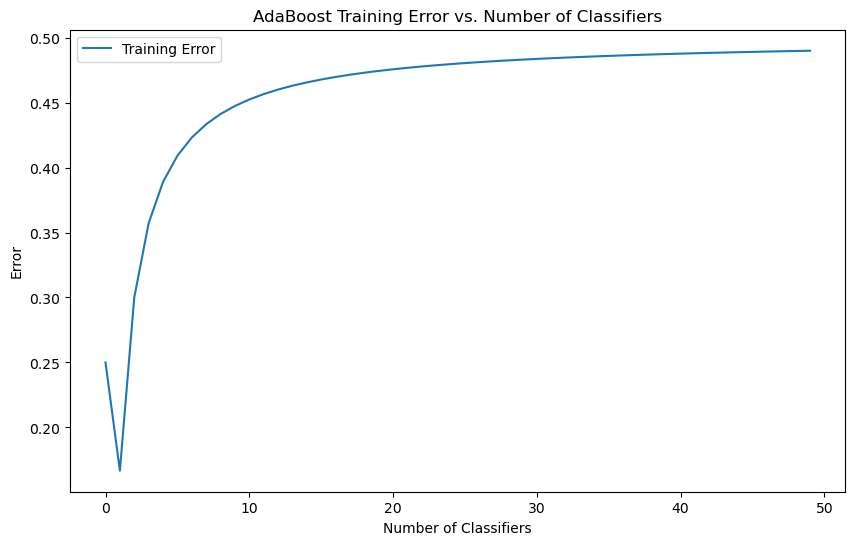

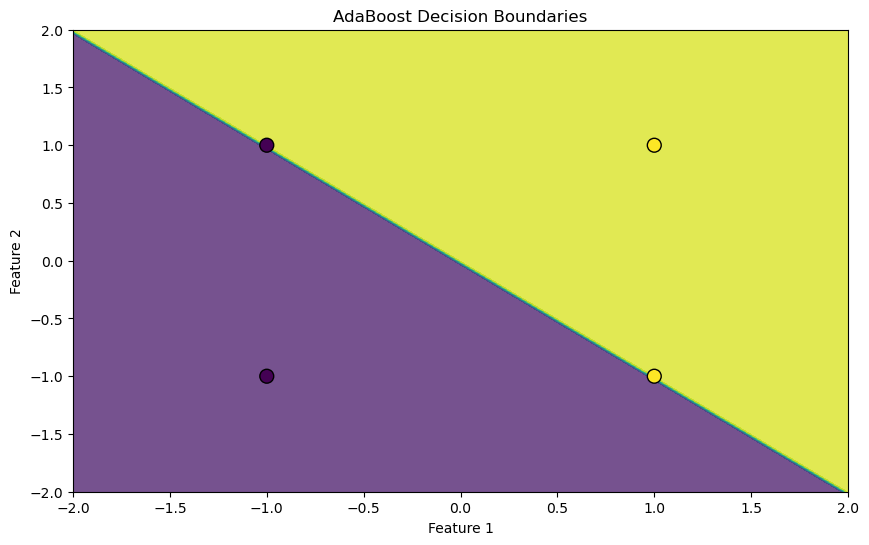

In [11]:
import math
import matplotlib.pyplot as plt

class SimpleClassifier:
    """
    A simple classifier for binary classification that returns +1 or -1 based on a threshold
    """
    def __init__(self):
        self.threshold = None

    def fit(self, X, y, sample_weights):
        # Calculate the threshold for the weak classifier based on weighted samples
        weighted_sum = [0] * len(X[0])  # Initialize a list for storing the weighted sum for each feature
        for i in range(len(X)):
            for j in range(len(X[i])):
                weighted_sum[j] += (y[i] == 1) * sample_weights[i] * X[i][j] - (y[i] == -1) * sample_weights[i] * X[i][j]

        self.threshold = [1 if value > 0 else -1 for value in weighted_sum]

    def predict(self, X):
        predictions = []
        for x in X:
            dot_product = sum([x[i] * self.threshold[i] for i in range(len(x))])
            predictions.append(1 if dot_product >= 0 else -1)
        return predictions

def adaboost(X, y, T):
    """
    AdaBoost algorithm implementation
    
    Args:
    - X: Feature matrix (n_samples x n_features)
    - y: Labels (n_samples)
    - T: Number of weak learners
    
    Returns:
    - classifiers: List of trained weak classifiers
    - alphas: List of alpha values for each weak classifier
    - errors: List of errors at each iteration
    """
    n_samples = len(X)
    w = [1.0 / n_samples] * n_samples  # Initialize sample weights uniformly
    classifiers = []
    alphas = []
    errors = []

    for t in range(T):
        # Train a weak classifier
        classifier = SimpleClassifier()
        classifier.fit(X, y, w)
        y_pred = classifier.predict(X)

        # Calculate the error
        error = sum([w[i] for i in range(n_samples) if y_pred[i] != y[i]]) / sum(w)
        errors.append(error)

        # If error is zero, stop early
        if error == 0:
            break

        # Compute the alpha (classifier weight)
        alpha = 0.5 * math.log((1 - error) / error)

        # Update sample weights
        for i in range(n_samples):
            if y_pred[i] == y[i]:
                w[i] *= math.exp(-alpha)
            else:
                w[i] *= math.exp(alpha)

        # Normalize weights
        weight_sum = sum(w)
        w = [wi / weight_sum for wi in w]

        # Store the classifier and its weight
        classifiers.append(classifier)
        alphas.append(alpha)

    return classifiers, alphas, errors

def predict(X, classifiers, alphas):
    """
    Make predictions with AdaBoost
    
    Args:
    - X: Feature matrix (n_samples x n_features)
    - classifiers: List of trained weak classifiers
    - alphas: List of alpha values for each weak classifier
    
    Returns:
    - Predicted labels
    """
    pred = [0] * len(X)
    for classifier, alpha in zip(classifiers, alphas):
        y_pred = classifier.predict(X)
        for i in range(len(X)):
            pred[i] += alpha * y_pred[i]
    
    # Final prediction is the sign of the weighted sum
    return [1 if p >= 0 else -1 for p in pred]


# Example usage
if __name__ == "__main__":
    # Sample dataset (2D binary classification problem)
    X = [[1, 1], [1, -1], [-1, 1], [-1, -1]]  # 4 samples, 2 features
    y = [1, 1, -1, -1]  # Labels for the samples
    
    # Train AdaBoost with 50 iterations
    classifiers, alphas, errors = adaboost(X, y, T=50)
    
    # Plot Error vs. Number of Classifiers
    plt.figure(figsize=(10, 6))
    plt.plot(errors, label="Training Error")
    plt.xlabel("Number of Classifiers")
    plt.ylabel("Error")
    plt.title("AdaBoost Training Error vs. Number of Classifiers")
    plt.legend()
    plt.show()

    # Plot Decision Boundaries
    import numpy as np
    X_min, X_max = -2, 2
    Y_min, Y_max = -2, 2
    xx, yy = np.meshgrid(np.linspace(X_min, X_max, 100), np.linspace(Y_min, Y_max, 100))
    Z = np.array([predict([[xi, yi]], classifiers, alphas)[0] for xi, yi in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.75)
    plt.scatter([x[0] for x in X], [x[1] for x in X], c=y, edgecolors='k', marker='o', s=100)
    plt.title("AdaBoost Decision Boundaries")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


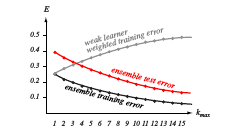

Fig.7: AdaBoost applied to a weak learning system can reduce the training error E exponentially as the number of component classiﬁers, kmax , is increased. Because AdaBoost “focuses on” diﬃcult training patterns, the training error of each successive component classiﬁer (measured on its own weighted training set) is generally larger than that of any previous component classiﬁer (shown in gray). Nevertheless, so long as the component classiﬁers perform better than chance (e.g., have error less than 0.5 on a two-category problem), the weighted ensemble decision of Eq. 36 insures that the training error will decrease, as given by Eq. 37. It is often found that the test error decreases in boosted systems as well, as shown in red.

## Learning with Queries

In the previous sections, we assumed that there was a set of labeled training patterns $ D $ and employed resampling methods to reuse patterns to improve classification. In some applications, however, the patterns are unlabeled. The challenge then is to determine which unlabeled patterns would be most informative, i.e., improve the classifier the most, if they were labeled and used as training patterns. These are the patterns we will present as a query to an oracle — a teacher who can label, without error, any pattern.

This approach is called variously learning with queries, active learning, or interactive learning, and it is a special case of a resampling technique. Learning with queries might be appropriate, for example, when we want to design a classifier for handwritten numerals using unlabeled pixel images scanned from documents from a corpus too large for us to label every pattern.

We could start by randomly selecting some patterns, presenting them to an oracle, and then training the classifier with the returned labels. We then use learning with queries to select unlabeled patterns from our set to present to a human (the oracle) for labeling. Informally, we would expect the most valuable patterns to be near the decision boundaries.

### Confidence-Based Query Selection

In confidence-based query selection, the classifier computes discriminant functions $ g_i(x) $ for the $ c $ categories. An informative pattern $ x $ is one for which the two largest discriminant functions have nearly the same value. Such patterns lie near the current decision boundaries. 

### Voting-Based or Committee-Based Query Selection

The second method is voting-based or committee-based query selection, which is applicable to multiclassifier systems. Each unlabeled pattern is presented to each of the $ k $ component classifiers. The pattern that yields the greatest disagreement among the $ k $ resulting category labels is considered the most informative pattern and is thus presented as a query to the oracle.

In both confidence-based and voting-based methods, the pattern labeled by the oracle is then used for training the classifier in the traditional way. 

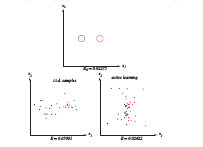

Fig.8: Active learning can be used to create classiﬁers that are more accurate than ones using i.i.d. sampling. The ﬁgure at the top shows a two-dimensional problem with two equal circular Gaussian priors; the Bayes decision boundary is a straight line and the Bayes error EB = 0.02275. The bottom ﬁgure on the left shows a nearest- neighbor classiﬁer trained with n = 30 labeled points sampled i.i.d. from the true distributions. Note that most of these points are far from the decision boundary. The ﬁgure at the right illustrates active learning. The ﬁrst four points were sampled near the extremes of the feature space. Subsequent query points were chosen midway between two points already used by the classiﬁer, one randomly selected from each of the two categories. In this way, successive queries to the oracle “focused in” on the true decision boundary. The ﬁnal generalization error of this classiﬁer (0.02422) is lower than the one trained using i.i.d. samples (0.05001).


### Example: Active Learning with AdaBoost

In the figure below, we illustrate how active learning can be used to improve a classifier beyond using i.i.d. samples. 

We start with a two-dimensional problem with two equal circular Gaussian priors. The Bayes decision boundary is a straight line, and the Bayes error is:

$$
E_B = 0.02275
$$

#### Nearest-Neighbor Classifier with i.i.d. Samples

The figure on the left shows a nearest-neighbor classifier trained with \( n = 30 \) labeled points sampled i.i.d. from the true distributions. Most of these points are far from the decision boundary.

#### Active Learning Approach

The figure on the right illustrates active learning. The first four points were sampled near the extremes of the feature space. Subsequent query points were chosen midway between two points already used by the classifier, one randomly selected from each of the two categories. In this way, successive queries to the oracle "focused in" on the true decision boundary.

### Benefits of Active Learning

- **Improved Generalization**: Active learning allows the classifier to focus on the most informative samples, reducing the training error.
- **Reduced Labeling Costs**: By selecting only the most informative samples for labeling, fewer labeled points are needed for effective training.

#### Error Comparison

- The final generalization error of the classifier trained using active learning is lower than that of the classifier trained using i.i.d. samples:
  
$$
E_{\text{active}} = 0.02422 \quad \text{(active learning error)}
$$

$$
E_{\text{iid}} = 0.05001 \quad \text{(i.i.d. sampling error)}
$$

### Resampling, Boosting, and Bias-Variance Tradeoff

Resampling methods and active learning do not directly exploit information about the prior distribution of the patterns. However, they are useful because they allow the class to match the final classifier to the problem. In particular, as the number of component classifiers in boosting increases, these methods broaden the class of implementable functions, allowing the designer to indirectly adjust the bias and variance.

The power of resampling methods like boosting is that they can be used with an arbitrary classification technique such as the Perceptron, which would otherwise be difficult to adjust to the complexity of an arbitrary problem.


## Learning with Queries

In the previous sections, we assumed that there was a set of labeled training patterns $ D $ and employed resampling methods to reuse patterns to improve classification. In some applications, however, the patterns are unlabeled. The challenge then is to determine which unlabeled patterns would be most informative, i.e., improve the classifier the most, if they were labeled and used as training patterns. These are the patterns we will present as a query to an oracle — a teacher who can label, without error, any pattern.

This approach is called variously learning with queries, active learning, or interactive learning, and it is a special case of a resampling technique. Learning with queries might be appropriate, for example, when we want to design a classifier for handwritten numerals using unlabeled pixel images scanned from documents from a corpus too large for us to label every pattern.

We could start by randomly selecting some patterns, presenting them to an oracle, and then training the classifier with the returned labels. We then use learning with queries to select unlabeled patterns from our set to present to a human (the oracle) for labeling. Informally, we would expect the most valuable patterns to be near the decision boundaries.

### Confidence-Based Query Selection

In confidence-based query selection, the classifier computes discriminant functions $ g_i(x) $ for the $ c $ categories. An informative pattern $ x $ is one for which the two largest discriminant functions have nearly the same value. Such patterns lie near the current decision boundaries. 

### Voting-Based or Committee-Based Query Selection

The second method is voting-based or committee-based query selection, which is applicable to multiclassifier systems. Each unlabeled pattern is presented to each of the $ k $ component classifiers. The pattern that yields the greatest disagreement among the $ k $ resulting category labels is considered the most informative pattern and is thus presented as a query to the oracle.

In both confidence-based and voting-based methods, the pattern labeled by the oracle is then used for training the classifier in the traditional way. 

### Example: Active Learning with AdaBoost

In the figure below, we illustrate how active learning can be used to improve a classifier beyond using i.i.d. samples. 

We start with a two-dimensional problem with two equal circular Gaussian priors. The Bayes decision boundary is a straight line, and the Bayes error is:

$$
E_B = 0.02275
$$

#### Nearest-Neighbor Classifier with i.i.d. Samples

The figure on the left shows a nearest-neighbor classifier trained with $ n = 30 $ labeled points sampled i.i.d. from the true distributions. Most of these points are far from the decision boundary.

#### Active Learning Approach

The figure on the right illustrates active learning. The first four points were sampled near the extremes of the feature space. Subsequent query points were chosen midway between two points already used by the classifier, one randomly selected from each of the two categories. In this way, successive queries to the oracle "focused in" on the true decision boundary.

### Benefits of Active Learning

- **Improved Generalization**: Active learning allows the classifier to focus on the most informative samples, reducing the training error.
- **Reduced Labeling Costs**: By selecting only the most informative samples for labeling, fewer labeled points are needed for effective training.

#### Error Comparison

- The final generalization error of the classifier trained using active learning is lower than that of the classifier trained using i.i.d. samples:
  
$$
E_{\text{active}} = 0.02422 \quad \text{(active learning error)}
$$

$$
E_{\text{iid}} = 0.05001 \quad \text{(i.i.d. sampling error)}
$$

### Resampling, Boosting, and Bias-Variance Tradeoff

Resampling methods and active learning do not directly exploit information about the prior distribution of the patterns. However, they are useful because they allow the class to match the final classifier to the problem. In particular, as the number of component classifiers in boosting increases, these methods broaden the class of implementable functions, allowing the designer to indirectly adjust the bias and variance.

The power of resampling methods like boosting is that they can be used with an arbitrary classification technique such as the Perceptron, which would otherwise be difficult to adjust to the complexity of an arbitrary problem.


In [15]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

# Generate synthetic data
X, y = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_classes=2, 
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0, 
    random_state=42
)

# Split data into training and pool
X_train_initial, X_pool, y_train_initial, y_pool = train_test_split(X, y, test_size=0.9, random_state=42)

# Initialize a classifier
classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Fit classifier on initial small training set
classifier.fit(X_train_initial, y_train_initial)

# Define the active learning function
def query_active_learning(classifier, X_pool, y_pool, n_queries=5):
    # Check if there are enough samples in the pool
    if len(X_pool) == 0:
        print("No samples in the pool to query.")
        return []
    
    # Get the decision function (prediction probabilities)
    probs = classifier.predict_proba(X_pool)
    
    # Calculate uncertainty (maximum probability difference for binary classification)
    uncertainty = 1 - np.max(probs, axis=1)
    
    # Select indices of the n_queries most uncertain samples
    query_idx = np.argsort(uncertainty)[-n_queries:]
    
    return query_idx

# Query the pool for 5 most uncertain samples
query_idx = query_active_learning(classifier, X_pool, y_pool, n_queries=5)

# Add the queried points to the training set
X_train_new = np.vstack([X_train_initial, X_pool[query_idx]])
y_train_new = np.hstack([y_train_initial, y_pool[query_idx]])

# Remove the queried samples from the pool
X_pool = np.delete(X_pool, query_idx, axis=0)
y_pool = np.delete(y_pool, query_idx)

# Train the classifier with the expanded training set
classifier.fit(X_train_new, y_train_new)


AdaBoostClassifier(random_state=42)

No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples in the pool to query.
No samples

/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


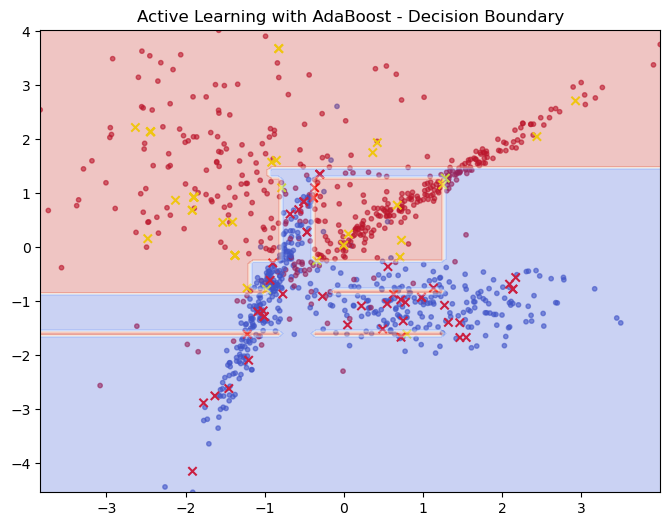

In [16]:
n_queries = 100  # Number of queries to make
for _ in range(n_queries):
    # Simulate querying the oracle: assume it provides labels for uncertain points
    pool_idx = np.setdiff1d(np.arange(X_train_initial.shape[0]), np.arange(X_train.shape[0]))
    X_pool, y_pool = X_train_initial[pool_idx], y_train_initial[pool_idx]
    
    query_idx = query_active_learning(classifier, X_pool, y_pool, n_queries=5)
    
    # Add the queried points to the training set
    X_train = np.vstack([X_train, X_pool[query_idx]])
    y_train = np.concatenate([y_train, y_pool[query_idx]])

    # Remove queried points from the pool
    X_train_initial = np.delete(X_train_initial, query_idx, axis=0)
    y_train_initial = np.delete(y_train_initial, query_idx)

# Evaluate the final model
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Final accuracy on test set: {accuracy:.4f}')

# Visualize the decision boundary and the samples selected by active learning
plt.figure(figsize=(8, 6))

# Plot the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', s=10, alpha=0.6)

# Plot the points added by active learning
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='autumn', edgecolors='k', marker='x')

# Decision boundary of the classifier
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.title('Active Learning with AdaBoost - Decision Boundary')
plt.show()

In [17]:
import random

# Function to generate synthetic data (2D)
def generate_data(n_samples, n_features, n_classes):
    X = []
    y = []
    
    for _ in range(n_samples):
        # Generate random features in 2D space
        features = [random.uniform(-10, 10) for _ in range(n_features)]
        # Simple rule: label 0 for negative sum and label 1 for positive sum
        label = 1 if sum(features) > 0 else 0
        X.append(features)
        y.append(label)
        
    return X, y

# Simple classifier: Linear classifier for binary classification
class SimpleLinearClassifier:
    def __init__(self, n_features):
        self.weights = [random.uniform(-1, 1) for _ in range(n_features)]
        self.bias = random.uniform(-1, 1)
    
    def predict(self, X):
        # Linear prediction: sum(features * weights) + bias
        return [1 if sum([x * w for x, w in zip(xi, self.weights)]) + self.bias > 0 else 0 for xi in X]
    
    def fit(self, X, y):
        # Basic training by adjusting weights using a very simple gradient descent
        learning_rate = 0.1
        for epoch in range(100):  # Simulating training over epochs
            for xi, target in zip(X, y):
                prediction = self.predict([xi])[0]
                error = target - prediction
                for i in range(len(xi)):
                    self.weights[i] += learning_rate * error * xi[i]
                self.bias += learning_rate * error

# Active learning query function: selecting samples near decision boundary
def query_active_learning(classifier, X_pool, n_queries=5):
    # Calculate uncertainty for each sample (based on simple linear margin)
    uncertainties = []
    for sample in X_pool:
        # Calculate the decision value (X * weights + bias)
        decision_value = sum([x * w for x, w in zip(sample, classifier.weights)]) + classifier.bias
        uncertainty = abs(decision_value)  # Absolute value of the decision margin
        uncertainties.append(uncertainty)
    
    # Select the most uncertain samples (highest decision value)
    query_idx = sorted(range(len(uncertainties)), key=lambda i: uncertainties[i], reverse=True)[:n_queries]
    
    return query_idx

# Generate synthetic data (1000 samples, 2 features, 2 classes)
X, y = generate_data(1000, 2, 2)

# Split data into initial training set (small) and pool
X_train_initial = X[:20]
y_train_initial = y[:20]
X_pool = X[20:]
y_pool = y[20:]

# Initialize classifier
classifier = SimpleLinearClassifier(n_features=2)

# Train classifier on the initial training set
classifier.fit(X_train_initial, y_train_initial)

# Simulate active learning loop
for i in range(5):  # Simulate 5 active learning iterations
    # Query the pool for 5 most uncertain samples
    query_idx = query_active_learning(classifier, X_pool, n_queries=5)
    
    # Add queried points to the training set
    X_train_new = X_train_initial + [X_pool[i] for i in query_idx]
    y_train_new = y_train_initial + [y_pool[i] for i in query_idx]
    
    # Remove the queried samples from the pool
    X_pool = [X_pool[i] for i in range(len(X_pool)) if i not in query_idx]
    y_pool = [y_pool[i] for i in range(len(y_pool)) if i not in query_idx]
    
    # Train the classifier with the expanded training set
    classifier.fit(X_train_new, y_train_new)
    
    print(f"Iteration {i+1}: Number of samples in training set = {len(X_train_new)}")

# Final model is trained on the selected queried data
print("Final classifier weights:", classifier.weights)
print("Final classifier bias:", classifier.bias)


Iteration 1: Number of samples in training set = 25
Iteration 2: Number of samples in training set = 25
Iteration 3: Number of samples in training set = 25
Iteration 4: Number of samples in training set = 25
Iteration 5: Number of samples in training set = 25
Final classifier weights: [0.2819232822452331, 0.30603663631262545]
Final classifier bias: -0.28638882409138355


/home/radha/anaconda3/envs/cv37/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


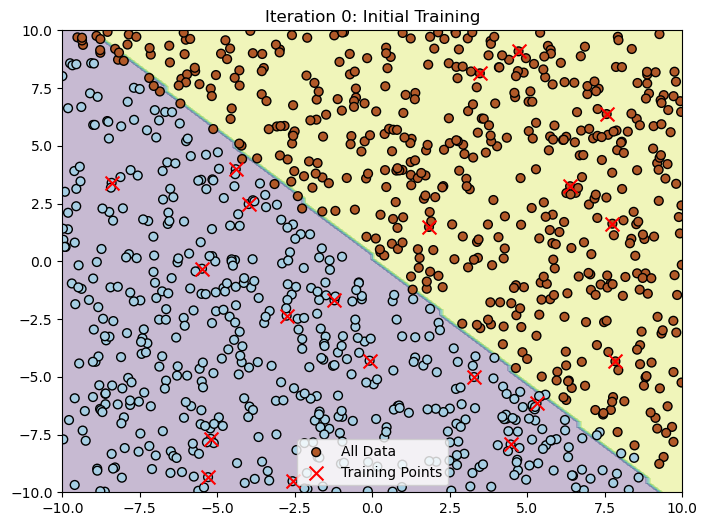

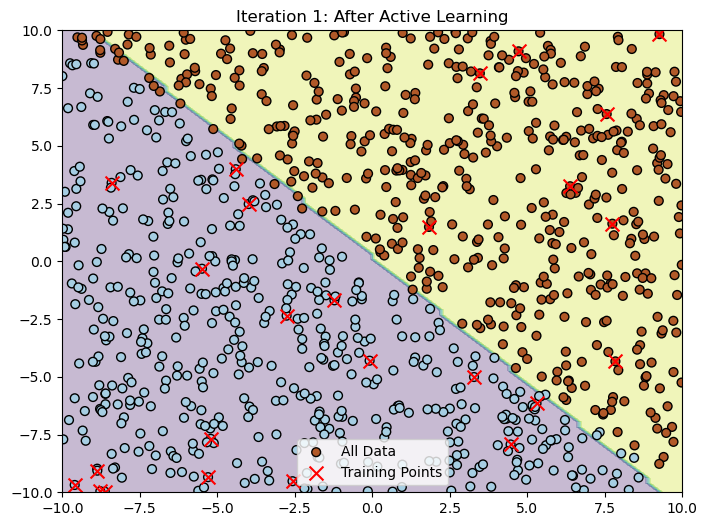

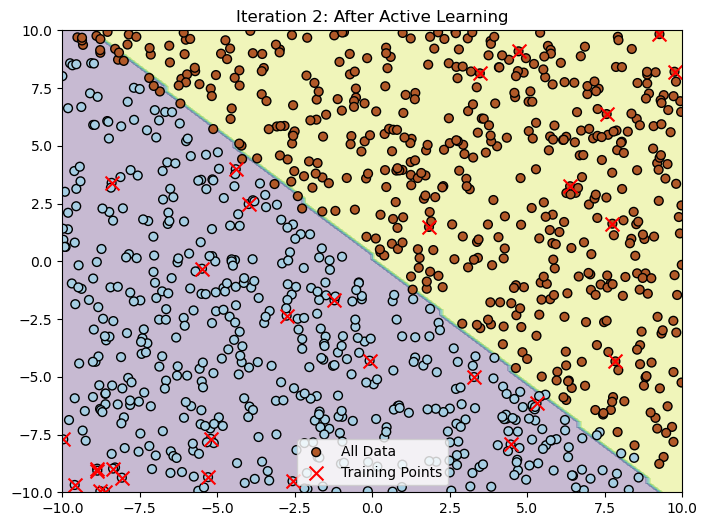

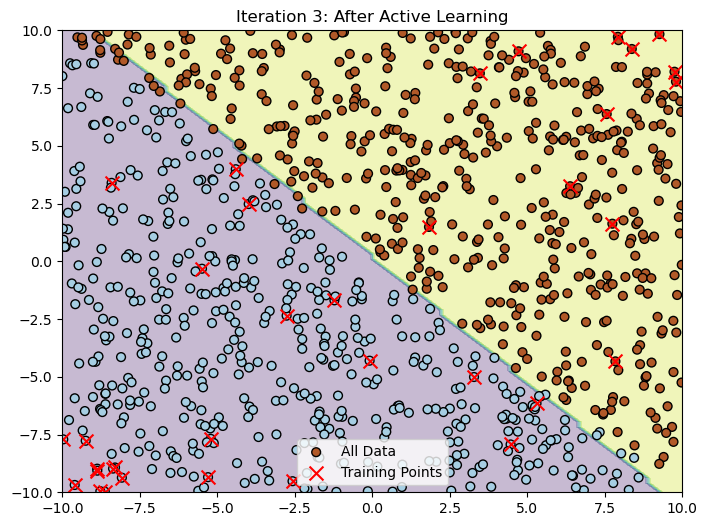

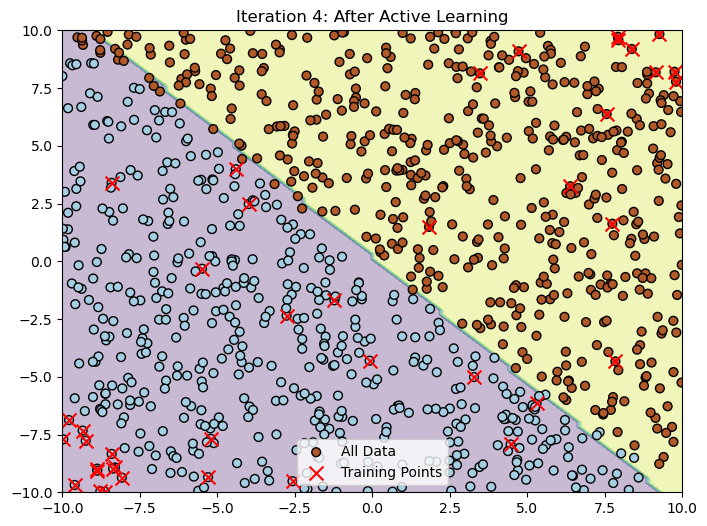

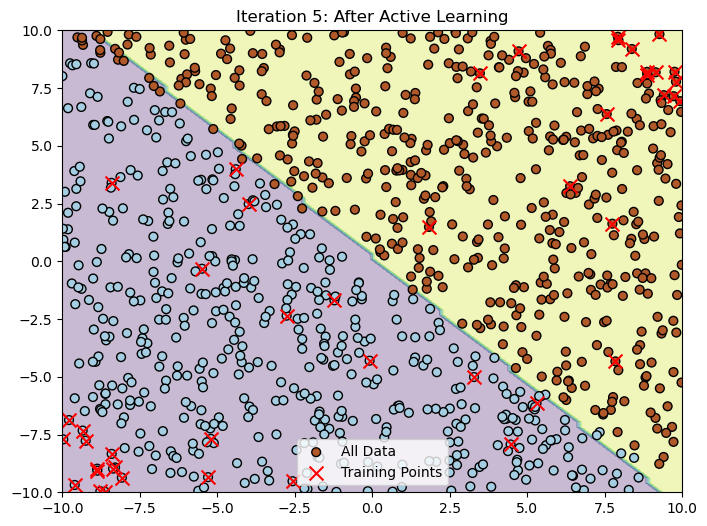

Final classifier weights: [1.045906789093579, 0.9583350166597822]
Final classifier bias: -0.19653551035505537


In [18]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Function to generate synthetic data (2D)
def generate_data(n_samples, n_features, n_classes):
    X = []
    y = []
    
    for _ in range(n_samples):
        # Generate random features in 2D space
        features = [random.uniform(-10, 10) for _ in range(n_features)]
        # Simple rule: label 0 for negative sum and label 1 for positive sum
        label = 1 if sum(features) > 0 else 0
        X.append(features)
        y.append(label)
        
    return X, y

# Simple classifier: Linear classifier for binary classification
class SimpleLinearClassifier:
    def __init__(self, n_features):
        self.weights = [random.uniform(-1, 1) for _ in range(n_features)]
        self.bias = random.uniform(-1, 1)
    
    def predict(self, X):
        # Linear prediction: sum(features * weights) + bias
        return [1 if sum([x * w for x, w in zip(xi, self.weights)]) + self.bias > 0 else 0 for xi in X]
    
    def fit(self, X, y):
        # Basic training by adjusting weights using a very simple gradient descent
        learning_rate = 0.1
        for epoch in range(100):  # Simulating training over epochs
            for xi, target in zip(X, y):
                prediction = self.predict([xi])[0]
                error = target - prediction
                for i in range(len(xi)):
                    self.weights[i] += learning_rate * error * xi[i]
                self.bias += learning_rate * error

# Active learning query function: selecting samples near decision boundary
def query_active_learning(classifier, X_pool, n_queries=5):
    # Calculate uncertainty for each sample (based on simple linear margin)
    uncertainties = []
    for sample in X_pool:
        # Calculate the decision value (X * weights + bias)
        decision_value = sum([x * w for x, w in zip(sample, classifier.weights)]) + classifier.bias
        uncertainty = abs(decision_value)  # Absolute value of the decision margin
        uncertainties.append(uncertainty)
    
    # Select the most uncertain samples (highest decision value)
    query_idx = sorted(range(len(uncertainties)), key=lambda i: uncertainties[i], reverse=True)[:n_queries]
    
    return query_idx

# Function to plot the data points and decision boundary
def plot_decision_boundary(classifier, X, y, X_train, title="Decision Boundary"):
    plt.figure(figsize=(8, 6))
    
    # Create meshgrid for decision boundary
    x_min, x_max = -10, 10
    y_min, y_max = -10, 10
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Get predictions for each point in the meshgrid
    Z = np.array([classifier.predict([[x, y]])[0] for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # Plot data points
    plt.scatter([x[0] for x in X], [x[1] for x in X], c=y, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=40, label="All Data")
    
    # Highlight the training points
    plt.scatter([x[0] for x in X_train], [x[1] for x in X_train], c='red', edgecolors='k', marker='x', s=100, label="Training Points")
    
    plt.title(title)
    plt.legend()
    plt.show()

# Generate synthetic data (1000 samples, 2 features, 2 classes)
X, y = generate_data(1000, 2, 2)

# Split data into initial training set (small) and pool
X_train_initial = X[:20]
y_train_initial = y[:20]
X_pool = X[20:]
y_pool = y[20:]

# Initialize classifier
classifier = SimpleLinearClassifier(n_features=2)

# Train classifier on the initial training set
classifier.fit(X_train_initial, y_train_initial)

# Plot the initial decision boundary
plot_decision_boundary(classifier, X, y, X_train_initial, title="Iteration 0: Initial Training")

# Simulate active learning loop
for i in range(5):  # Simulate 5 active learning iterations
    # Query the pool for 5 most uncertain samples
    query_idx = query_active_learning(classifier, X_pool, n_queries=5)
    
    # Add queried points to the training set
    X_train_new = X_train_initial + [X_pool[i] for i in query_idx]
    y_train_new = y_train_initial + [y_pool[i] for i in query_idx]
    
    # Remove the queried samples from the pool
    X_pool = [X_pool[i] for i in range(len(X_pool)) if i not in query_idx]
    y_pool = [y_pool[i] for i in range(len(y_pool)) if i not in query_idx]
    
    # Train the classifier with the expanded training set
    classifier.fit(X_train_new, y_train_new)
    
    # Plot the decision boundary after this iteration
    plot_decision_boundary(classifier, X, y, X_train_new, title=f"Iteration {i+1}: After Active Learning")
    
    # Update initial training set for next iteration
    X_train_initial = X_train_new
    y_train_initial = y_train_new

# Final model is trained on the selected queried data
print("Final classifier weights:", classifier.weights)
print("Final classifier bias:", classifier.bias)
